##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE214295**

file previously downloaded:
GSE214295_RAW.tar

unzipped using 
``` bash
tar -xvf GSE214295_RAW.tar
```

This gives the following files:                         
* GSM6603324_Primary001_barcodes.tsv.gz
* GSM6603324_Primary001_genes.tsv.gz
* GSM6603324_Primary001_matrix.mtx.gz
* GSM6603325_Primary002_barcodes.tsv.gz
* GSM6603325_Primary002_genes.tsv.gz
* GSM6603325_Primary002_matrix.mtx.gz
* GSM6603326_Primary003_barcodes.tsv.gz
* GSM6603326_Primary003_genes.tsv.gz
* GSM6603326_Primary003_matrix.mtx.gz
* GSM6603327_PDO001_barcodes.tsv.gz
* GSM6603327_PDO001_genes.tsv.gz
* GSM6603327_PDO001_matrix.mtx.gz
* GSM6603328_PDO002_barcodes.tsv.gz
* GSM6603328_PDO002_genes.tsv.gz
* GSM6603328_PDO002_matrix.mtx.gz
* GSM6603329_PDO003_barcodes.tsv.gz
* GSM6603329_PDO003_genes.tsv.gz
* GSM6603329_PDO003_matrix.mtx.gz

Files organised in to correct folders and file names, only analysing 3 tumour samples (PDO samples are organoids, not analysing these)

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE214295')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE214295"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
#load all datasets
PC1.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE214295/Primary001")
PC2.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE214295/Primary002")
PC3.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE214295/Primary003")


In [4]:
#Add dataset info to colnames
colnames(PC1.data) <- paste0("GSE214295_PC1_", colnames(PC1.data))
colnames(PC2.data) <- paste0("GSE214295_PC2_", colnames(PC2.data))
colnames(PC3.data) <- paste0("GSE214295_PC3_", colnames(PC3.data))


In [5]:
head(colnames(PC1.data))
head(colnames(PC2.data))
head(colnames(PC3.data))

[1] "GSE214295_PC1_AAACCCAAGATTTGCC-1" "GSE214295_PC1_AAACCCACACTGAGGA-1"
[3] "GSE214295_PC1_AAACCCACAGCTGTAT-1" "GSE214295_PC1_AAACCCAGTAGGCTGA-1"
[5] "GSE214295_PC1_AAACCCAGTCCACGCA-1" "GSE214295_PC1_AAACCCATCCATTGCC-1"

[1] "GSE214295_PC2_AAACCCAAGCTCATAC-1" "GSE214295_PC2_AAACCCACACAACGTT-1"
[3] "GSE214295_PC2_AAACCCACAGCGTTGC-1" "GSE214295_PC2_AAACCCAGTGGACTAG-1"
[5] "GSE214295_PC2_AAACCCAGTTCCCACT-1" "GSE214295_PC2_AAACCCAGTTGGTACT-1"

[1] "GSE214295_PC3_AAACCCAAGCAGAAAG-1" "GSE214295_PC3_AAACCCAAGGTAGCAC-1"
[3] "GSE214295_PC3_AAACCCACAGAAATTG-1" "GSE214295_PC3_AAACCCAGTACGCTTA-1"
[5] "GSE214295_PC3_AAACCCAGTCGGAAAC-1" "GSE214295_PC3_AAACCCAGTGTTTCTT-1"

In [6]:
#create seperate seurat object for each sample
PC1 <- CreateSeuratObject(counts = PC1.data, project = "GSE214295", min.features = 200)
#add metadata to sample
PC1@meta.data$sample_type <- "tumour"
PC1@meta.data$cancer_type <- "PC"
PC1@meta.data$patient_id <- "PC1"
PC1@meta.data$sample_id <- "GSE214295_PC1"

In [7]:
#create seperate seurat object for each sample
PC2 <- CreateSeuratObject(counts = PC2.data, project = "GSE214295", min.features = 200)
#add metadata to sample
PC2@meta.data$sample_type <- "tumour"
PC2@meta.data$cancer_type <- "PC"
PC2@meta.data$patient_id <- "PC2"
PC2@meta.data$sample_id <- "GSE214295_PC2"

In [8]:
#create seperate seurat object for each sample
PC3 <- CreateSeuratObject(counts = PC3.data, project = "GSE214295", min.features = 200)
#add metadata to sample
PC3@meta.data$sample_type <- "tumour"
PC3@meta.data$cancer_type <- "PC"
PC3@meta.data$patient_id <- "PC3"
PC3@meta.data$sample_id <- "GSE214295_PC3"

In [9]:
head(PC1@meta.data) 
head(PC2@meta.data) 
head(PC3@meta.data) 

orig.ident nCount_RNA nFeature_RNA sample_type
GSE214295_PC1_AAACCCAAGATTTGCC-1 GSE214295  32561      6203         tumour     
GSE214295_PC1_AAACCCACACTGAGGA-1 GSE214295   6114      2316         tumour     
GSE214295_PC1_AAACCCACAGCTGTAT-1 GSE214295   2665       823         tumour     
GSE214295_PC1_AAACCCAGTAGGCTGA-1 GSE214295   2737       950         tumour     
GSE214295_PC1_AAACCCAGTCCACGCA-1 GSE214295   7288      2355         tumour     
GSE214295_PC1_AAACCCATCCATTGCC-1 GSE214295   3861      1281         tumour     
                                 cancer_type patient_id sample_id    
GSE214295_PC1_AAACCCAAGATTTGCC-1 PC          PC1        GSE214295_PC1
GSE214295_PC1_AAACCCACACTGAGGA-1 PC          PC1        GSE214295_PC1
GSE214295_PC1_AAACCCACAGCTGTAT-1 PC          PC1        GSE214295_PC1
GSE214295_PC1_AAACCCAGTAGGCTGA-1 PC          PC1        GSE214295_PC1
GSE214295_PC1_AAACCCAGTCCACGCA-1 PC          PC1        GSE214295_PC1
GSE214295_PC1_AAACCCATCCATTGCC-1 PC          PC1        GSE214295_PC1

orig.ident nCount_RNA nFeature_RNA sample_type
GSE214295_PC2_AAACCCAAGCTCATAC-1 GSE214295   1526       770         tumour     
GSE214295_PC2_AAACCCACACAACGTT-1 GSE214295  30444      5884         tumour     
GSE214295_PC2_AAACCCACAGCGTTGC-1 GSE214295  12892      3568         tumour     
GSE214295_PC2_AAACCCAGTGGACTAG-1 GSE214295   5818      2153         tumour     
GSE214295_PC2_AAACCCAGTTCCCACT-1 GSE214295  16930      4503         tumour     
GSE214295_PC2_AAACCCAGTTGGTACT-1 GSE214295  12549      3798         tumour     
                                 cancer_type patient_id sample_id    
GSE214295_PC2_AAACCCAAGCTCATAC-1 PC          PC2        GSE214295_PC2
GSE214295_PC2_AAACCCACACAACGTT-1 PC          PC2        GSE214295_PC2
GSE214295_PC2_AAACCCACAGCGTTGC-1 PC          PC2        GSE214295_PC2
GSE214295_PC2_AAACCCAGTGGACTAG-1 PC          PC2        GSE214295_PC2
GSE214295_PC2_AAACCCAGTTCCCACT-1 PC          PC2        GSE214295_PC2
GSE214295_PC2_AAACCCAGTTGGTACT-1 PC          PC2        GSE214295_PC2

orig.ident nCount_RNA nFeature_RNA sample_type
GSE214295_PC3_AAACCCAAGCAGAAAG-1 GSE214295   1827       521         tumour     
GSE214295_PC3_AAACCCAAGGTAGCAC-1 GSE214295  30847      4451         tumour     
GSE214295_PC3_AAACCCACAGAAATTG-1 GSE214295   1642       739         tumour     
GSE214295_PC3_AAACCCAGTACGCTTA-1 GSE214295   2453      1093         tumour     
GSE214295_PC3_AAACCCAGTCGGAAAC-1 GSE214295   4955      1958         tumour     
GSE214295_PC3_AAACCCAGTGTTTCTT-1 GSE214295   1988       944         tumour     
                                 cancer_type patient_id sample_id    
GSE214295_PC3_AAACCCAAGCAGAAAG-1 PC          PC3        GSE214295_PC3
GSE214295_PC3_AAACCCAAGGTAGCAC-1 PC          PC3        GSE214295_PC3
GSE214295_PC3_AAACCCACAGAAATTG-1 PC          PC3        GSE214295_PC3
GSE214295_PC3_AAACCCAGTACGCTTA-1 PC          PC3        GSE214295_PC3
GSE214295_PC3_AAACCCAGTCGGAAAC-1 PC          PC3        GSE214295_PC3
GSE214295_PC3_AAACCCAGTGTTTCTT-1 PC          PC3        GSE214295_PC3

In [10]:
#Merge seurat objects
PC <- merge(PC1, y = c(PC2, PC3), project = "GSE214295")

In [11]:
PC
head(PC@meta.data)
tail(PC@meta.data)

An object of class Seurat 
36601 features across 29110 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)
 3 layers present: counts.1, counts.2, counts.3

orig.ident nCount_RNA nFeature_RNA sample_type
GSE214295_PC1_AAACCCAAGATTTGCC-1 GSE214295  32561      6203         tumour     
GSE214295_PC1_AAACCCACACTGAGGA-1 GSE214295   6114      2316         tumour     
GSE214295_PC1_AAACCCACAGCTGTAT-1 GSE214295   2665       823         tumour     
GSE214295_PC1_AAACCCAGTAGGCTGA-1 GSE214295   2737       950         tumour     
GSE214295_PC1_AAACCCAGTCCACGCA-1 GSE214295   7288      2355         tumour     
GSE214295_PC1_AAACCCATCCATTGCC-1 GSE214295   3861      1281         tumour     
                                 cancer_type patient_id sample_id    
GSE214295_PC1_AAACCCAAGATTTGCC-1 PC          PC1        GSE214295_PC1
GSE214295_PC1_AAACCCACACTGAGGA-1 PC          PC1        GSE214295_PC1
GSE214295_PC1_AAACCCACAGCTGTAT-1 PC          PC1        GSE214295_PC1
GSE214295_PC1_AAACCCAGTAGGCTGA-1 PC          PC1        GSE214295_PC1
GSE214295_PC1_AAACCCAGTCCACGCA-1 PC          PC1        GSE214295_PC1
GSE214295_PC1_AAACCCATCCATTGCC-1 PC          PC1        GSE214295_PC1

orig.ident nCount_RNA nFeature_RNA sample_type
GSE214295_PC3_TTTGTTGCACGCGGTT-1 GSE214295   1105       712         tumour     
GSE214295_PC3_TTTGTTGGTCACTCTC-1 GSE214295   8140      2055         tumour     
GSE214295_PC3_TTTGTTGGTCCGTTTC-1 GSE214295   2688      1047         tumour     
GSE214295_PC3_TTTGTTGGTCGAAGCA-1 GSE214295    765       397         tumour     
GSE214295_PC3_TTTGTTGTCGGCTTCT-1 GSE214295  19077      4278         tumour     
GSE214295_PC3_TTTGTTGTCTTGGTGA-1 GSE214295   2497      1055         tumour     
                                 cancer_type patient_id sample_id    
GSE214295_PC3_TTTGTTGCACGCGGTT-1 PC          PC3        GSE214295_PC3
GSE214295_PC3_TTTGTTGGTCACTCTC-1 PC          PC3        GSE214295_PC3
GSE214295_PC3_TTTGTTGGTCCGTTTC-1 PC          PC3        GSE214295_PC3
GSE214295_PC3_TTTGTTGGTCGAAGCA-1 PC          PC3        GSE214295_PC3
GSE214295_PC3_TTTGTTGTCGGCTTCT-1 PC          PC3        GSE214295_PC3
GSE214295_PC3_TTTGTTGTCTTGGTGA-1 PC          PC3        GSE214295_PC3

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


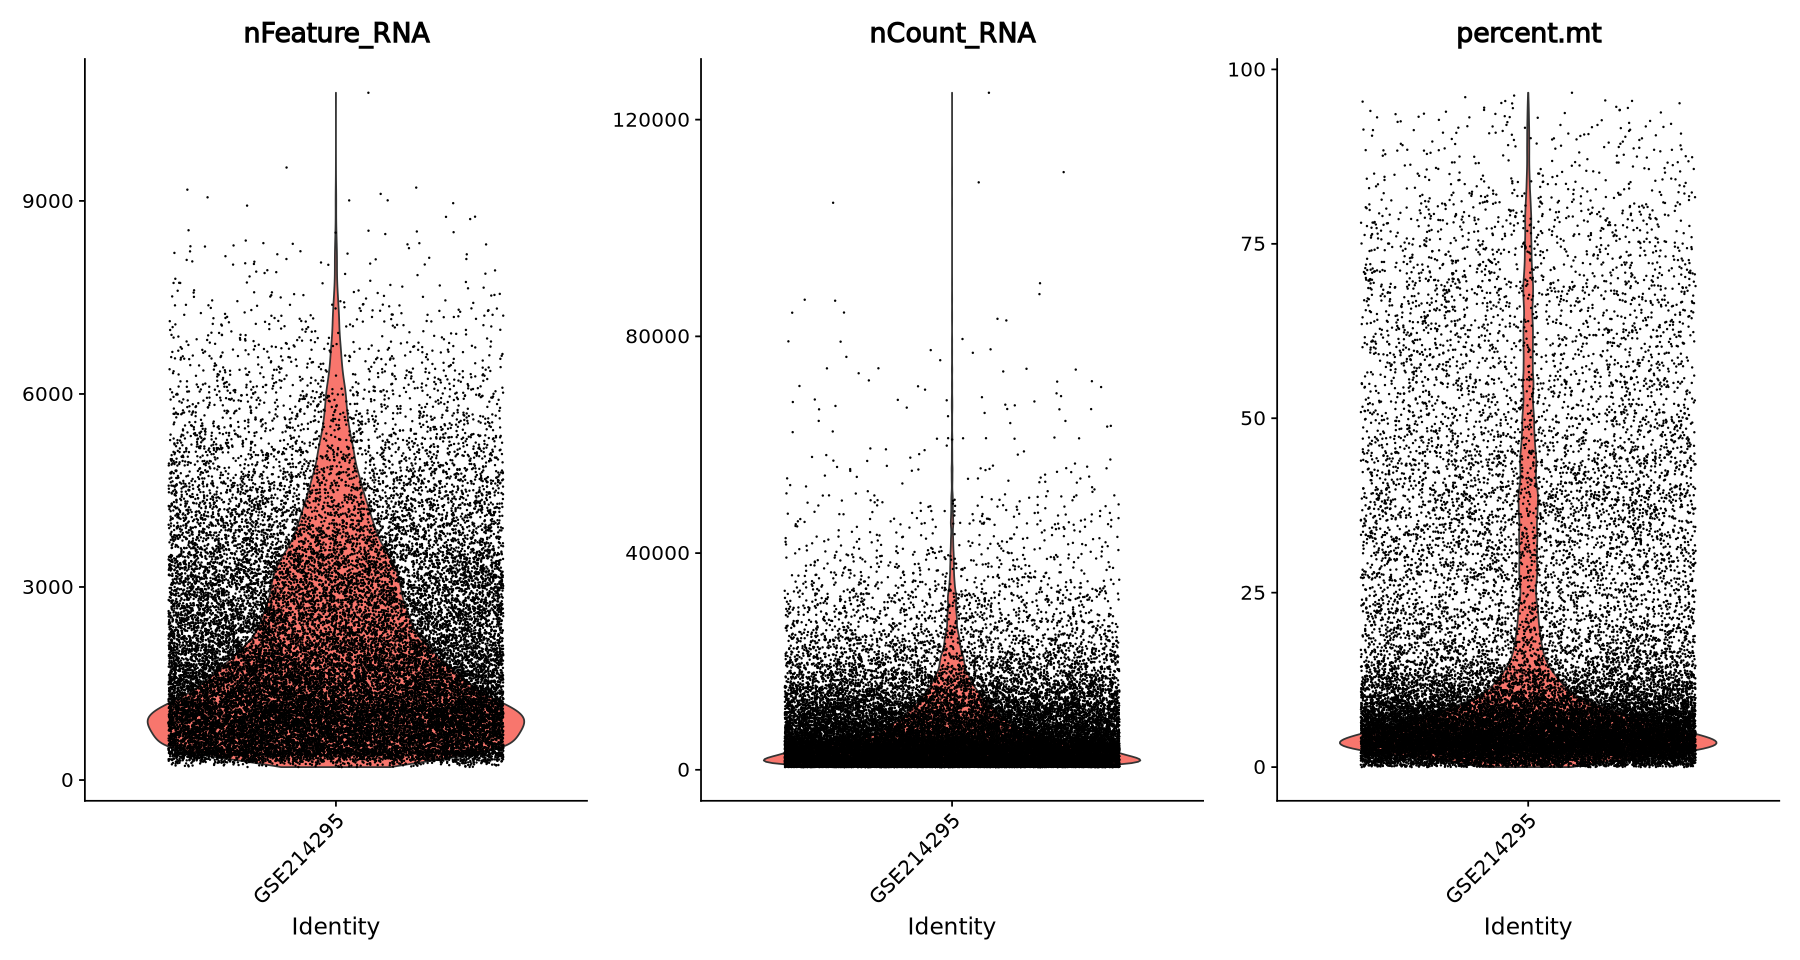

In [12]:
#QC Steps 
PC[["percent.mt"]] <- PercentageFeatureSet(PC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(PC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [13]:
#Normalise the data
PC <- NormalizeData(PC)
#Find variable features
PC <- FindVariableFeatures(PC, selection.method = "vst", nfeatures = 2000)
#Scale the data
PC <- ScaleData(PC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
PC <- RunPCA(PC, features = VariableFeatures(object = PC))

Normalizing layer: counts.1



Normalizing layer: counts.2

Normalizing layer: counts.3

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  KRT19, KRT8, CD24, CLDN4, EPCAM, CEACAM6, KRT18, AGR2, KRT7, LGALS4 
	   WFDC2, FXYD3, S100P, TSPAN8, SLPI, SMIM22, CLDN7, TACSTD2, SPINT2, ELF3 
	   MAL2, MUC1, OCIAD2, PERP, LCN2, TSPAN1, C19orf33, TCN1, KRT17, C12orf75 
Negative:  SPARC, CALD1, DCN, SERPINF1, MGP, VIM, BGN, IGFBP7, LUM, COL1A2 
	   AEBP1, TIMP3, MMP2, C1R, COL6A3, COL3A1, THY1, CCDC80, SPARCL1, FBLN1 
	   C1S, COL6A2, ASPN, LGALS1, FBN1, TCF4, VCAN, CTSK, COL5A2, RARRES2 
PC_ 2 
Positive:  SRGN, LAPTM5, TYROBP, FCER1G, MS4A7, GPR183, AIF1, RGS1, PTPRC, C1QA 
	   C1QB, SAMSN1, BCL2A1, C1QC, ALOX5AP, CD163, LCP1, MS4A6A, ITGB2, FCGR2A 
	   HLA-DPB1, IFI30, OLR1, HLA-DQB1, IL1B, PLEK, CYBB, CCL3, CD53, CCL4 
Negative:  COL1A2, COL6A1, D

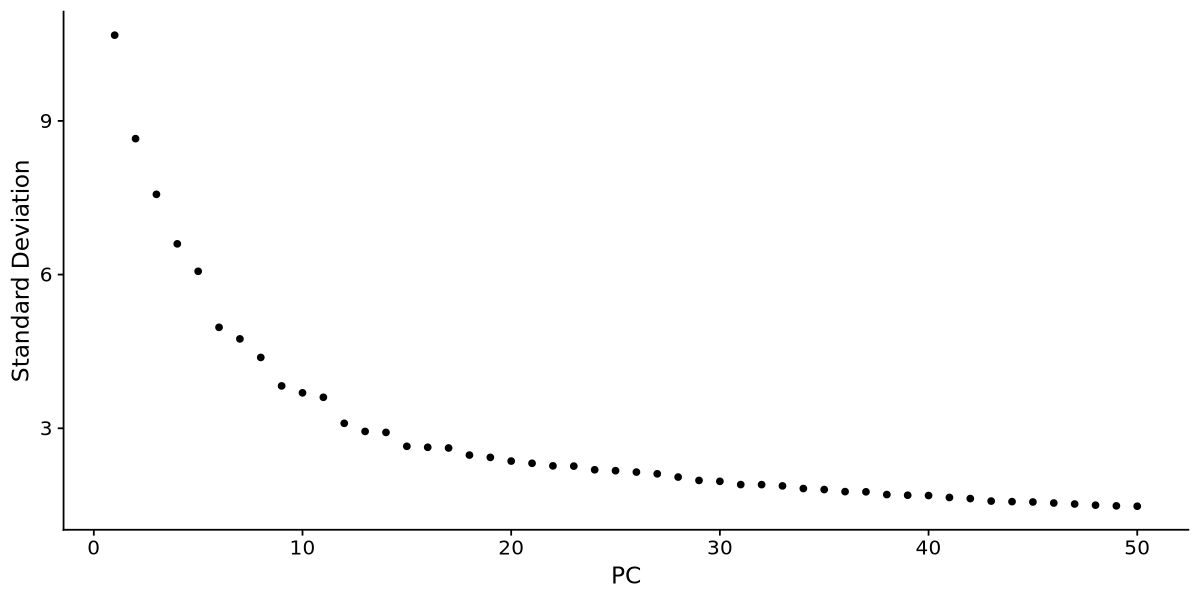

In [14]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(PC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [15]:
#Find neighbours (make sure number matches no. features chosen above)
PC <- FindNeighbors(PC, dims = 1:40)

Computing nearest neighbor graph

Computing SNN



In [16]:
#Run UMAP
PC <- RunUMAP(PC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:15:56 UMAP embedding parameters a = 0.9922 b = 1.112

12:15:56 Read 29110 rows and found 40 numeric columns

12:15:56 Using Annoy for neighbor search, n_neighbors = 30

12:15:56 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:16:00 Writing NN index file to temp file /scratch/temp/9337359/Rtmp1xvVAB/file3384f1d741fcc

12:16:00 Searching Annoy index using 1 thread, search_k = 3000

12:16:14 Annoy recall = 100%

12:16:15 Commencing smooth kNN distance calibration using 1 thread
 with t

In [17]:
#Cluster, resolution here set to 0.2
PC <- FindClusters(PC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 29110
Number of edges: 1086635

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9709
Number of communities: 18
Elapsed time: 13 seconds


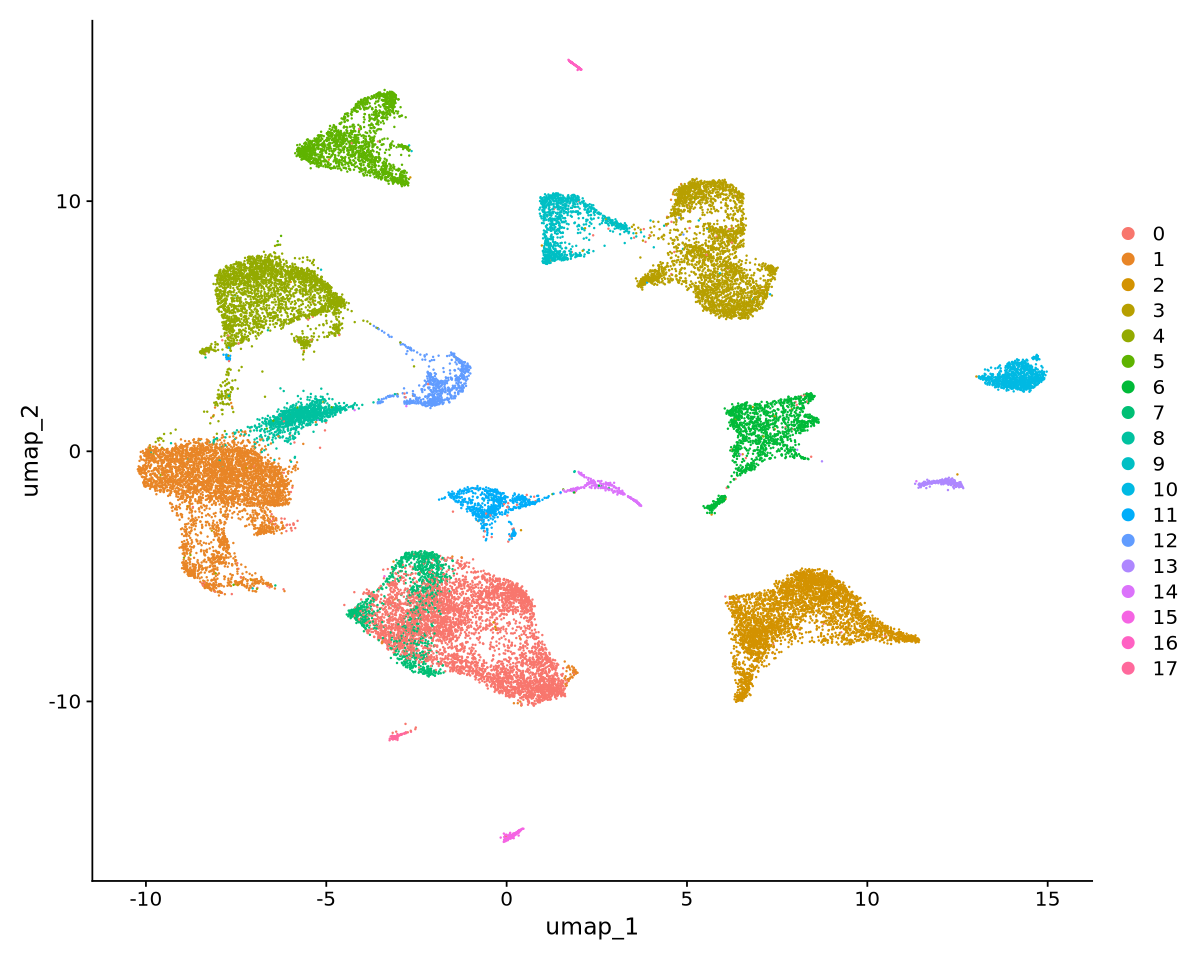

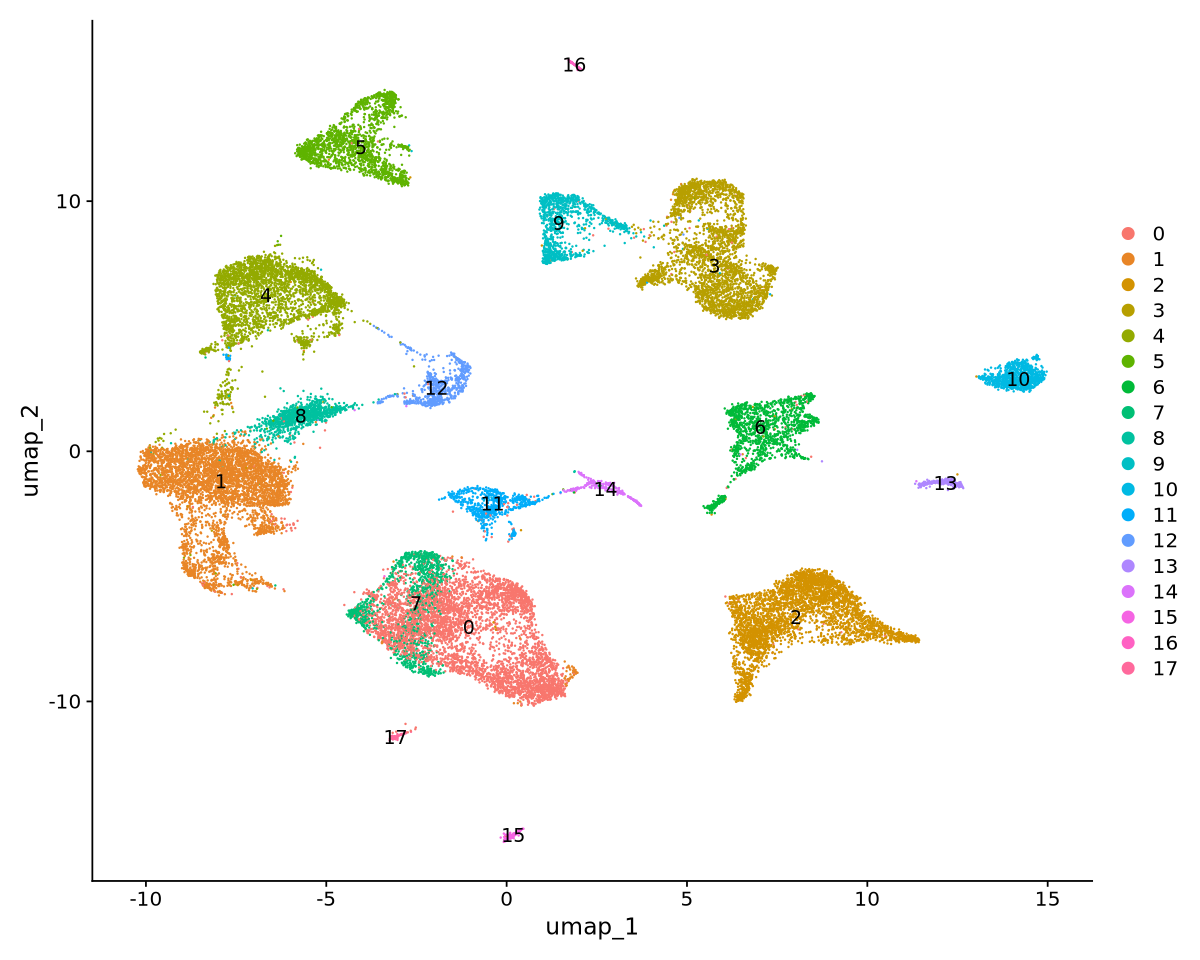

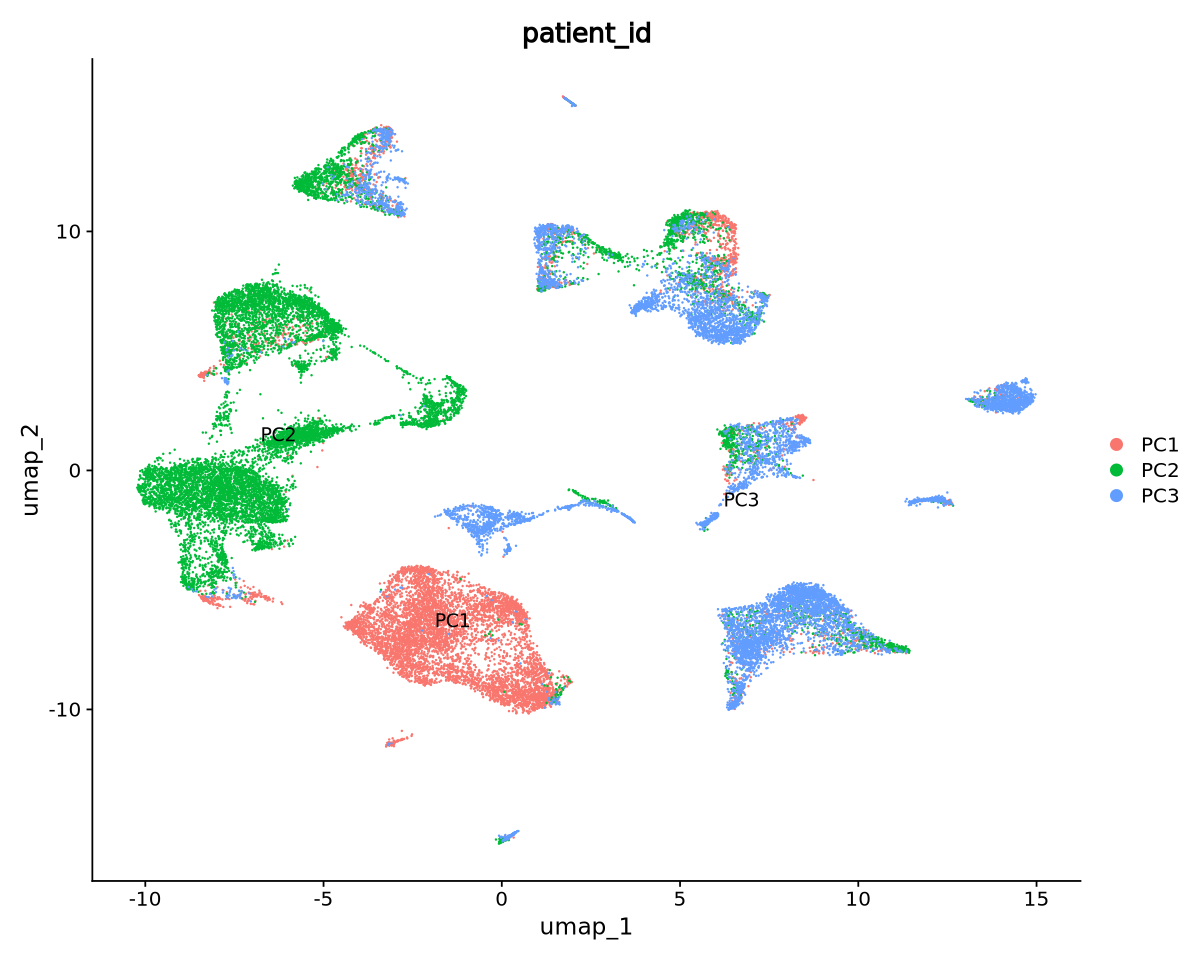

In [19]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(PC, reduction = "umap")
DimPlot(PC, reduction = "umap", label=TRUE)
DimPlot(PC, reduction = "umap", label=TRUE, group = "patient_id")

### populations quite different per patient, keep in mind below

In [20]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(PC, file = "/scratch/user/s4436039/scdata/GSE214295/GSE214295.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

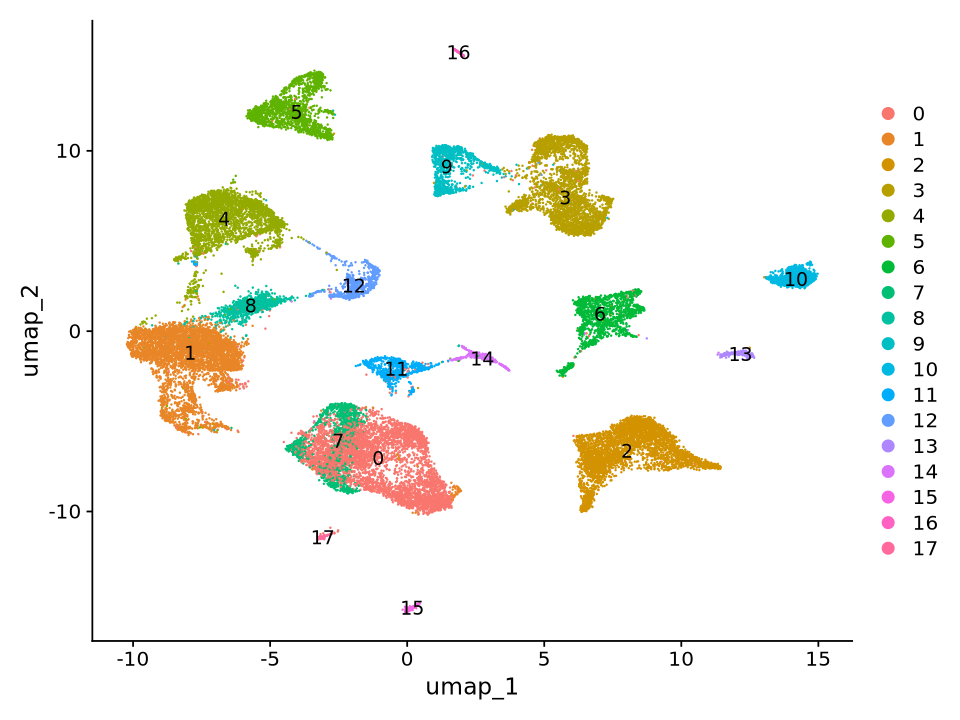

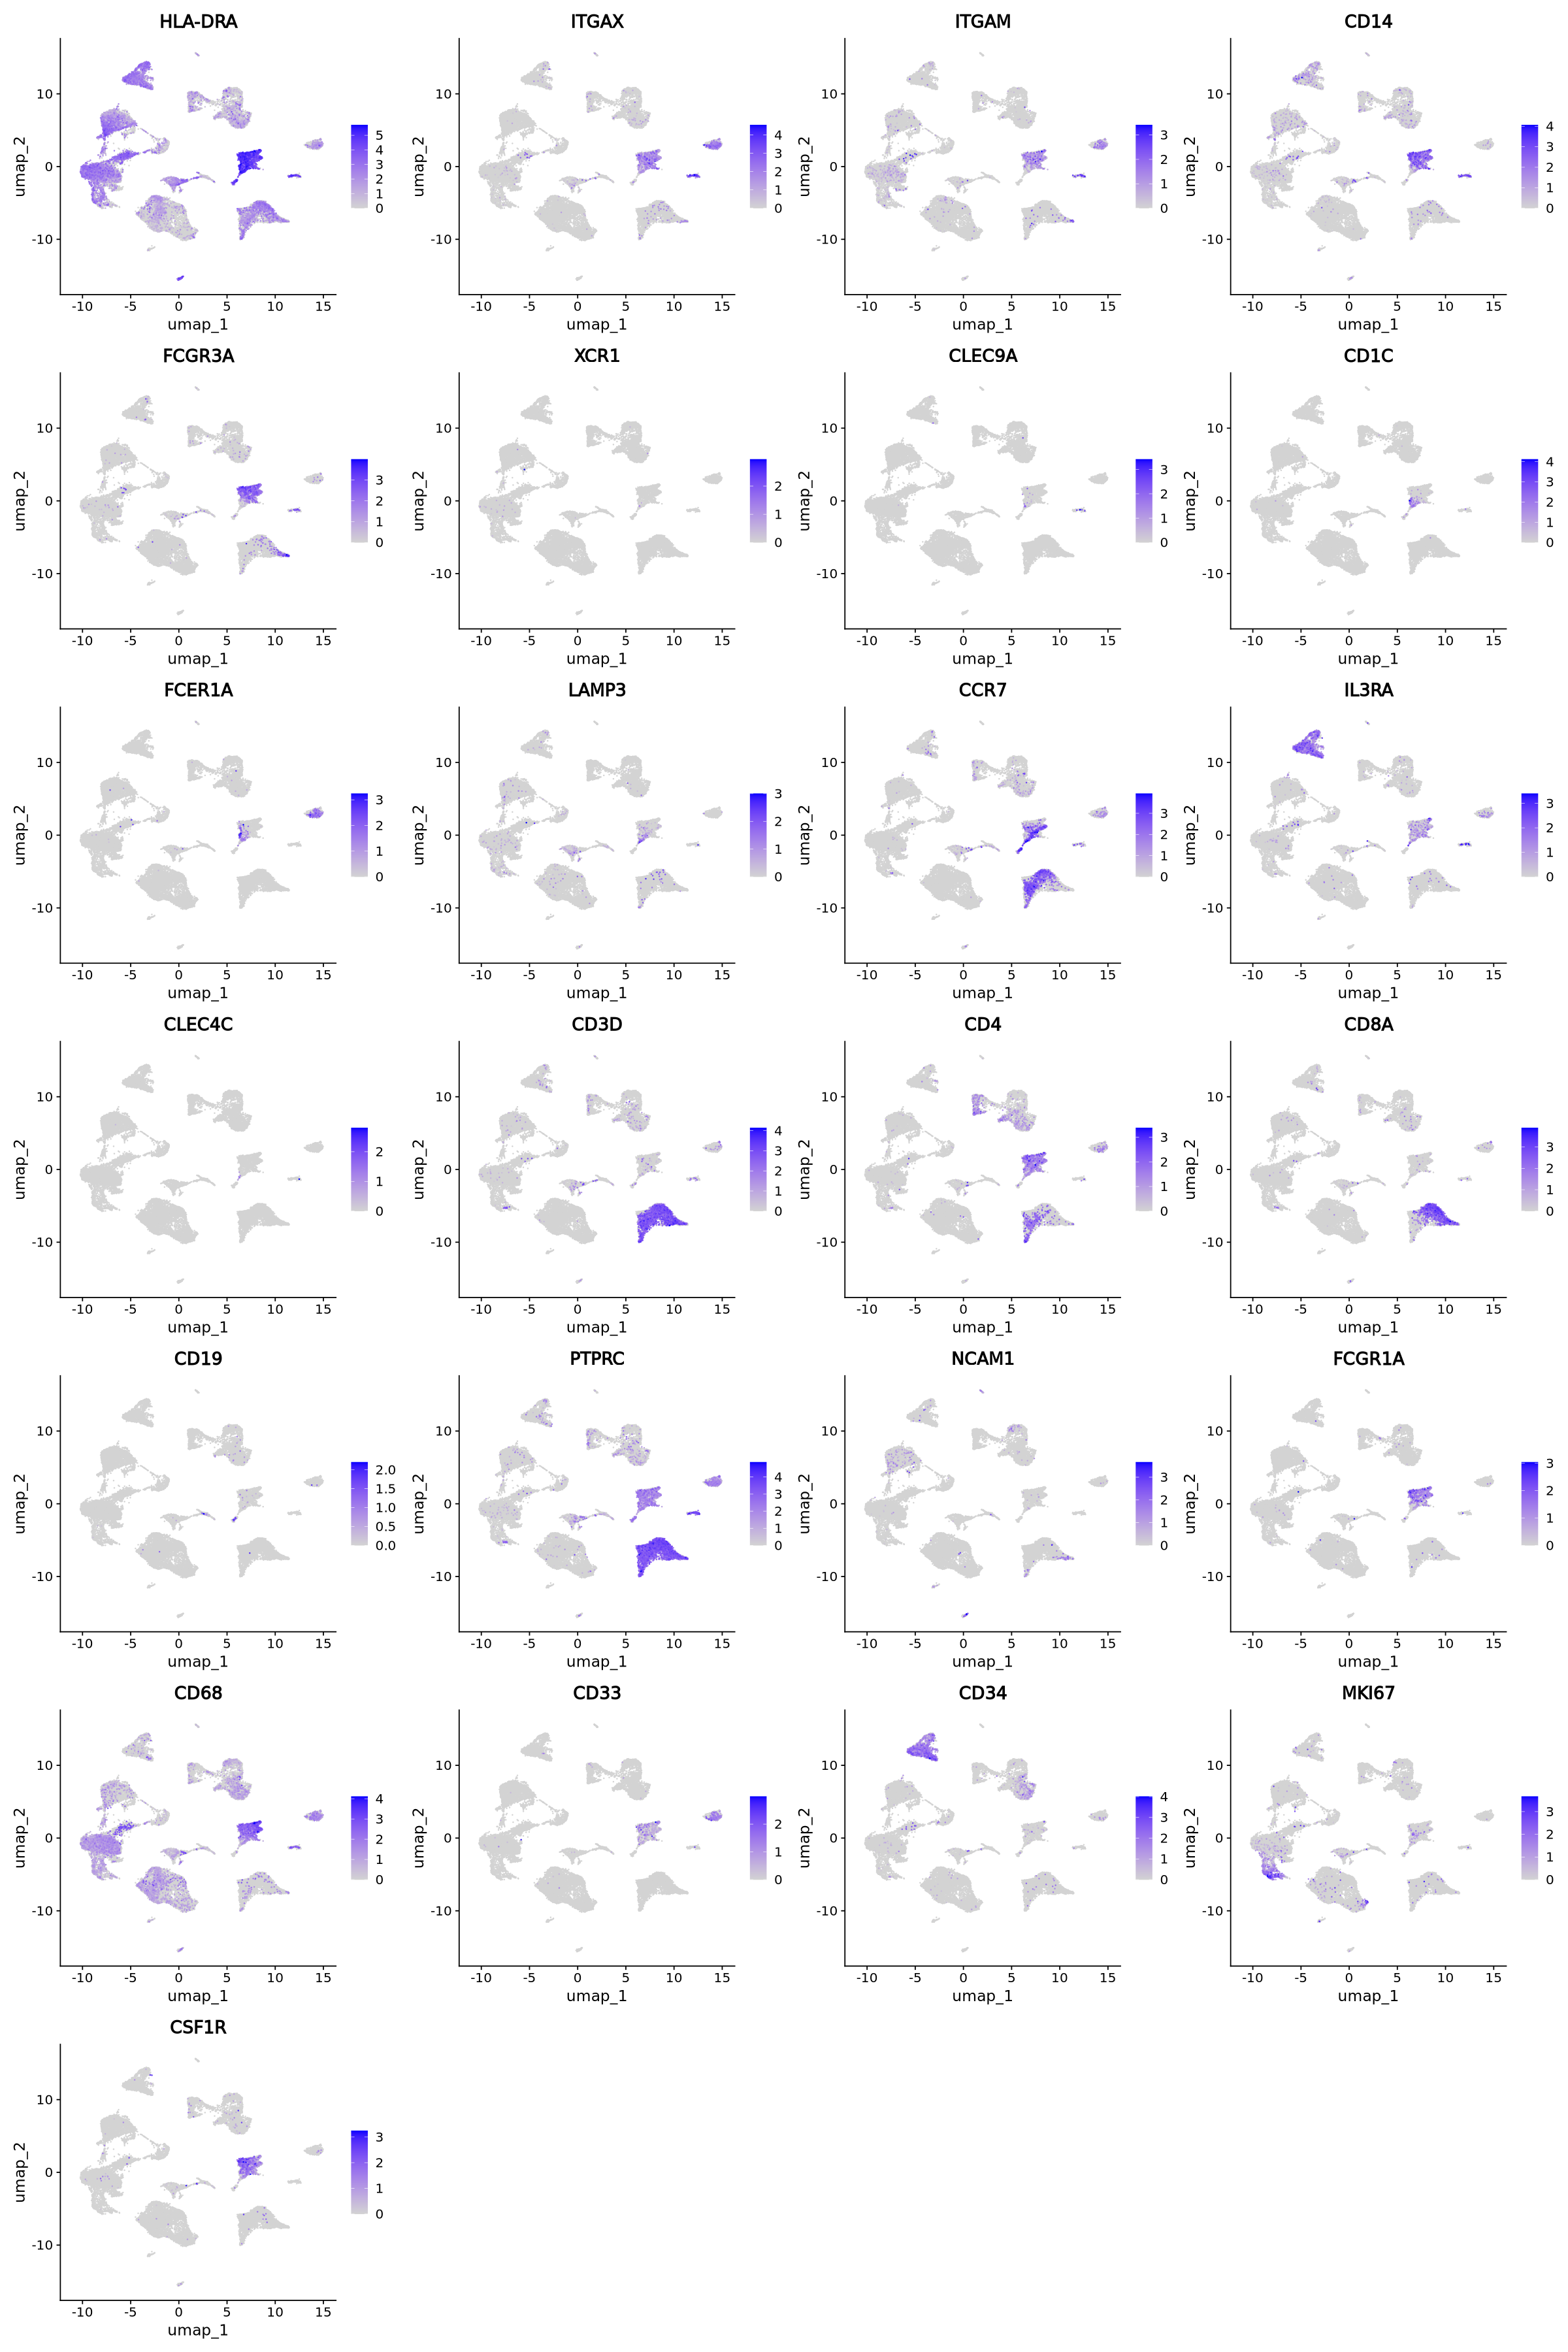

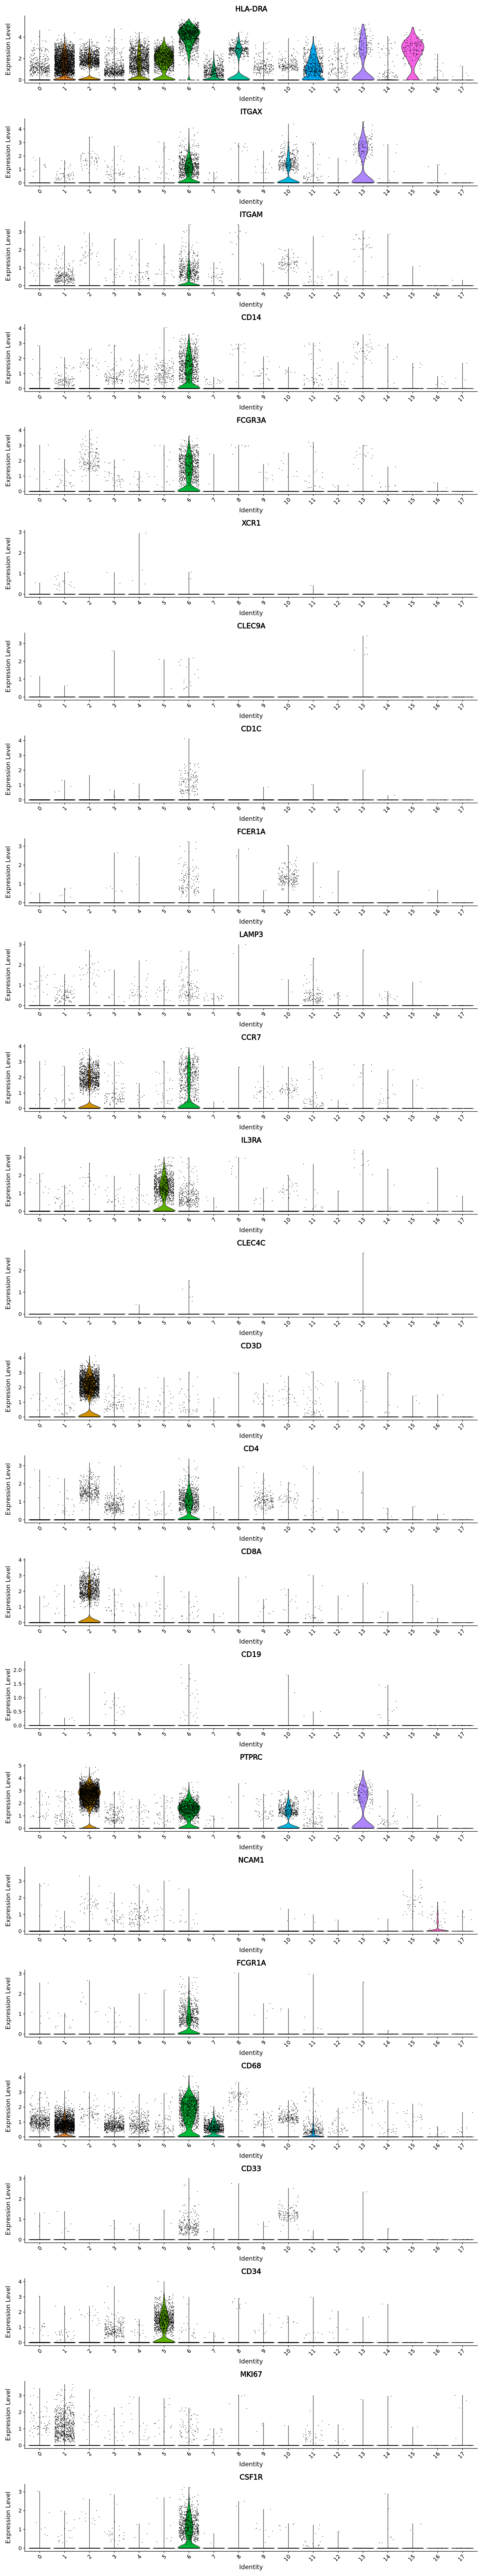

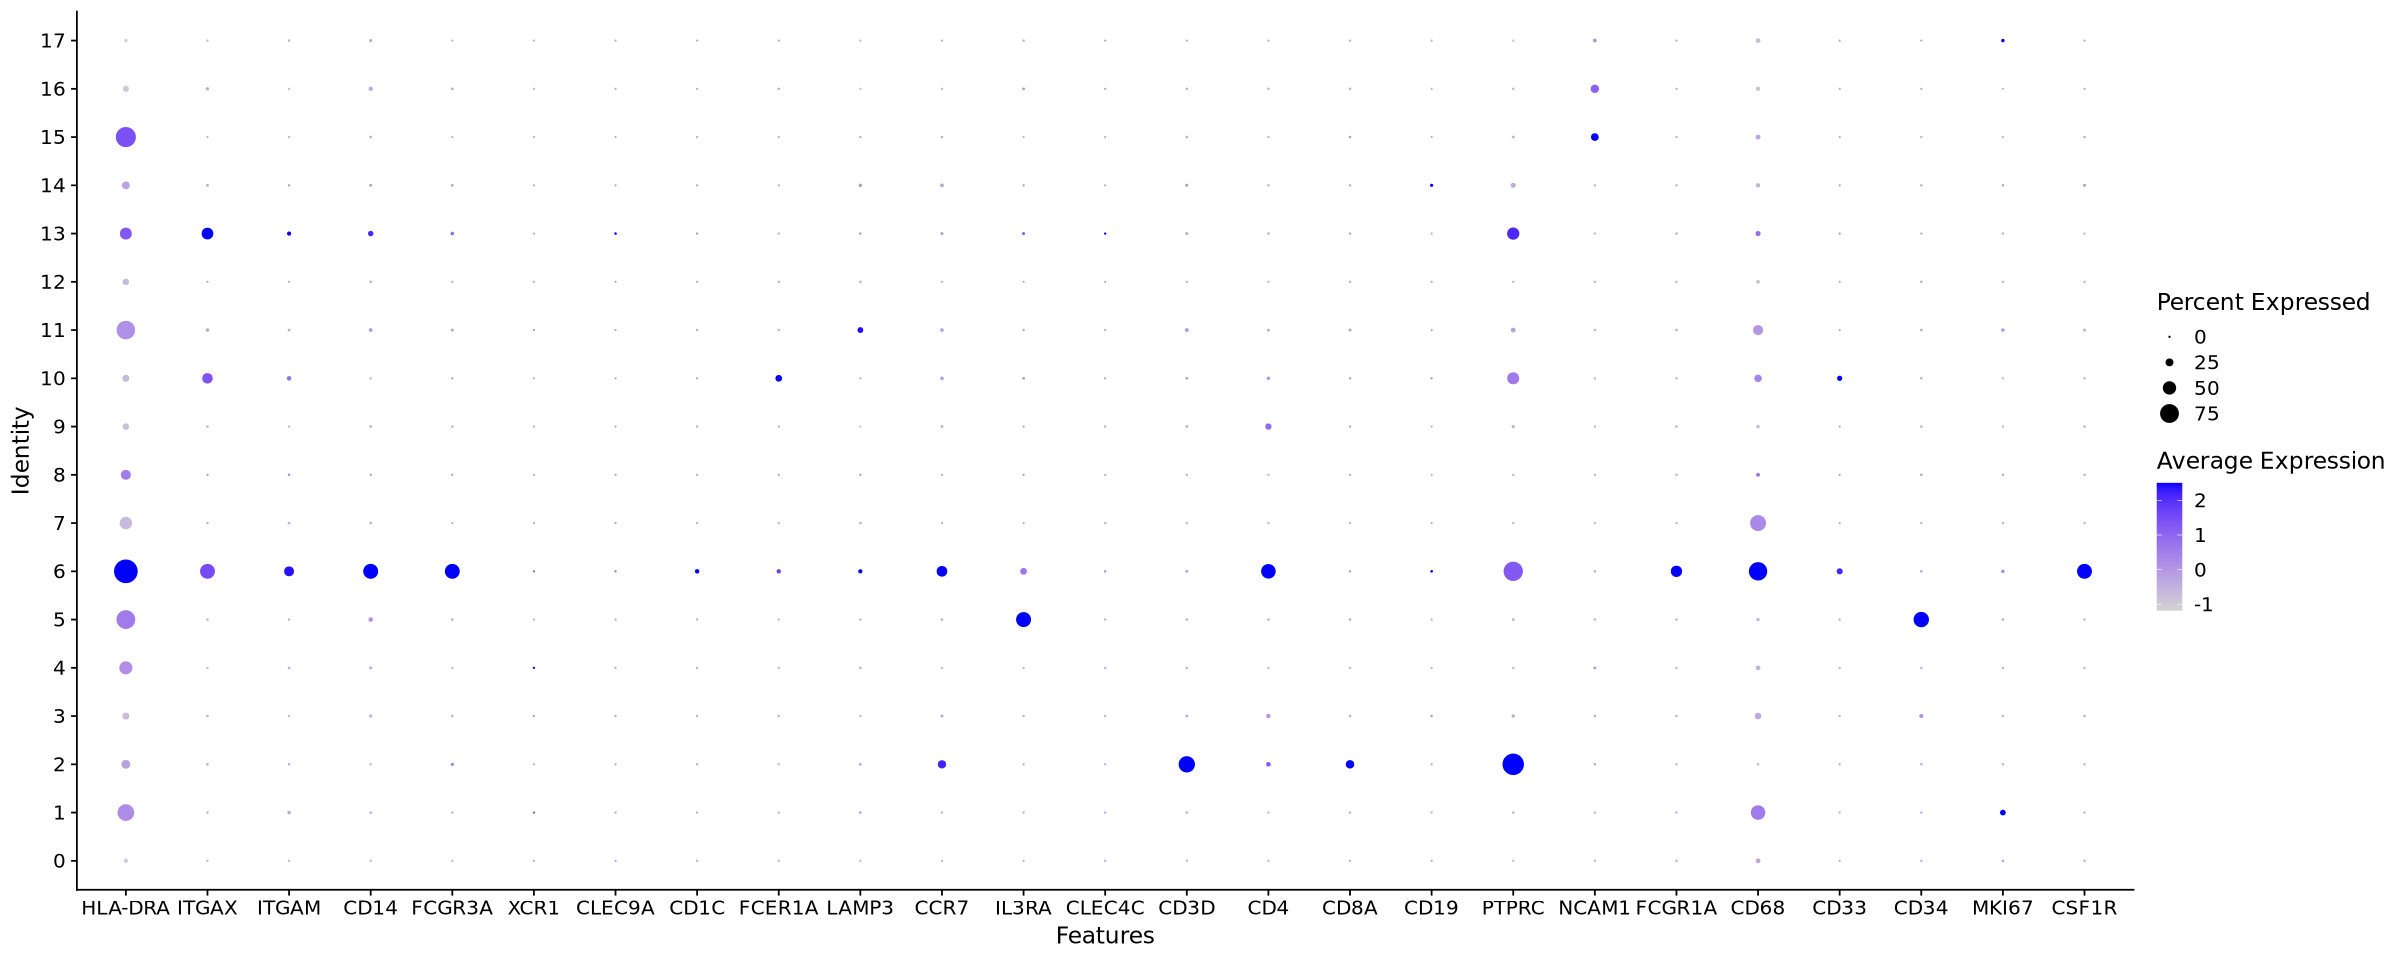

In [23]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(PC, reduction = "umap", label=TRUE)

options(repr.plot.height=30, repr.plot.width=20)
FeaturePlot(PC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(PC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(PC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

#### From above it looks like clusters 6, 10, 13 are the myeloid cells, now subsetting out these clusters

In [24]:
head(PC@meta.data)

orig.ident nCount_RNA nFeature_RNA sample_type
GSE214295_PC1_AAACCCAAGATTTGCC-1 GSE214295  32561      6203         tumour     
GSE214295_PC1_AAACCCACACTGAGGA-1 GSE214295   6114      2316         tumour     
GSE214295_PC1_AAACCCACAGCTGTAT-1 GSE214295   2665       823         tumour     
GSE214295_PC1_AAACCCAGTAGGCTGA-1 GSE214295   2737       950         tumour     
GSE214295_PC1_AAACCCAGTCCACGCA-1 GSE214295   7288      2355         tumour     
GSE214295_PC1_AAACCCATCCATTGCC-1 GSE214295   3861      1281         tumour     
                                 cancer_type patient_id sample_id    
GSE214295_PC1_AAACCCAAGATTTGCC-1 PC          PC1        GSE214295_PC1
GSE214295_PC1_AAACCCACACTGAGGA-1 PC          PC1        GSE214295_PC1
GSE214295_PC1_AAACCCACAGCTGTAT-1 PC          PC1        GSE214295_PC1
GSE214295_PC1_AAACCCAGTAGGCTGA-1 PC          PC1        GSE214295_PC1
GSE214295_PC1_AAACCCAGTCCACGCA-1 PC          PC1        GSE214295_PC1
GSE214295_PC1_AAACCCATCCATTGCC-1 PC          PC1        GSE214295_PC1
                                 percent.mt RNA_snn_res.0.2 seurat_clusters
GSE214295_PC1_AAACCCAAGATTTGCC-1 12.005160  7               7              
GSE214295_PC1_AAACCCACACTGAGGA-1 19.038273  7               7              
GSE214295_PC1_AAACCCACAGCTGTAT-1 48.217636  0               0              
GSE214295_PC1_AAACCCAGTAGGCTGA-1 38.070881  0               0              
GSE214295_PC1_AAACCCAGTCCACGCA-1  5.886389  3               3              
GSE214295_PC1_AAACCCATCCATTGCC-1  9.531210  9               9

In [25]:
myeloid_PC <- subset(PC, subset = RNA_snn_res.0.2 %in% c("6","10","13"))

In [26]:
myeloid_PC

An object of class Seurat 
36601 features across 2710 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 7 layers present: counts.1, counts.2, counts.3, data.1, data.2, data.3, scale.data
 2 dimensional reductions calculated: pca, umap

In [27]:
saveRDS(myeloid_PC, "/scratch/user/s4436039/scdata/GSE214295/GSE214295_myeloid.RDS")

#### Following the above then need to move entire GSE214295 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE214295/ /QRISdata/Q5935/nikita/scdata/GSE214295
```